# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd


# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

In [4]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [5]:
df_apps.shape

(10841, 12)

In [6]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [7]:
df_apps.sample(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
6893,Bluebird by American Express,FINANCE,4.20,15703,9.15,"1,000,000",Free,0,Everyone,Finance,"July 25, 2018",Varies with device
8189,Google My Business,BUSINESS,4.40,70991,7.20,"5,000,000",Free,0,Everyone,Business,"July 24, 2018",4.4 and up
9592,Zombie Hunter: Post Apocalypse Survival Games,GAME,4.40,327599,66.00,"10,000,000",Free,0,Teen,Action,"July 28, 2017",2.3.3 and up
7818,Loop - Habit Tracker,PRODUCTIVITY,4.70,17955,3.80,"1,000,000",Free,0,Everyone,Productivity,"May 23, 2018",4.0.3 and up
10408,slither.io,GAME,4.40,5231553,36.00,"100,000,000",Free,0,Everyone,Action,"November 14, 2017",2.3 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [8]:
# Use 'Android_Ver' instead of 'Android_Version'
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)

In [9]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres'],
      dtype='object')

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [10]:
print(df_apps['Rating'].isna().sum())
print(df_apps['Rating'].isna())

1474
0         True
1         True
2         True
3         True
4         True
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool


In [11]:
df_apps_clean = df_apps.dropna(subset=['Rating']).copy()

In [12]:
print(df_apps_clean.shape)
df_apps.shape

(9367, 10)


(10841, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [13]:
df_apps_clean.duplicated(subset=['App'])

21       False
28       False
47       False
82       False
99       False
         ...  
10836     True
10837     True
10838     True
10839     True
10840     True
Length: 9367, dtype: bool

In [14]:
df_apps_clean.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [15]:
df_apps_clean.shape

(8197, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [16]:
df_apps_clean.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres'],
      dtype='object')

In [17]:
# Create a filter (mask) where Rating equals the highest rating
top_rated = df_apps_clean[df_apps_clean['Rating'] == df_apps_clean['Rating'].max()]

# View the results
print(top_rated.size)
top_rated.head()



2710


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [18]:
df_apps_clean.sort_values(by='Size_MBs',ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10295,SimCity BuildIt,FAMILY,4.50,4218587,100.00,"50,000,000",Free,0,Everyone 10+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.60,151,100.00,"10,000",Free,0,Everyone,Racing
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
8718,Mini Golf King - Multiplayer Game,GAME,4.50,531458,100.00,"5,000,000",Free,0,Everyone,Sports


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [19]:
df_apps_clean.sort_values(by='Reviews',ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [20]:
# 1. Create a variable for the top 50 most reviewed apps
top_50_apps = df_apps_clean.sort_values(by='Reviews', ascending=False).head(50)

# 2. Check the 'Type' column for those 50 apps
# This will count how many are 'Free' vs 'Paid'
print(top_50_apps['Type'].value_counts())

Type
Free    50
Name: count, dtype: int64


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [21]:
ratings = df_apps_clean.Content_Rating.value_counts()
print(ratings)

Content_Rating
Everyone           6619
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [22]:
import plotly.express as px

To create a pie chart we simply call `px.pie()` and then `.show()` the resulting figure. Plotly refers to all their figures, be they line charts, bar charts, or pie charts as graph_objects.
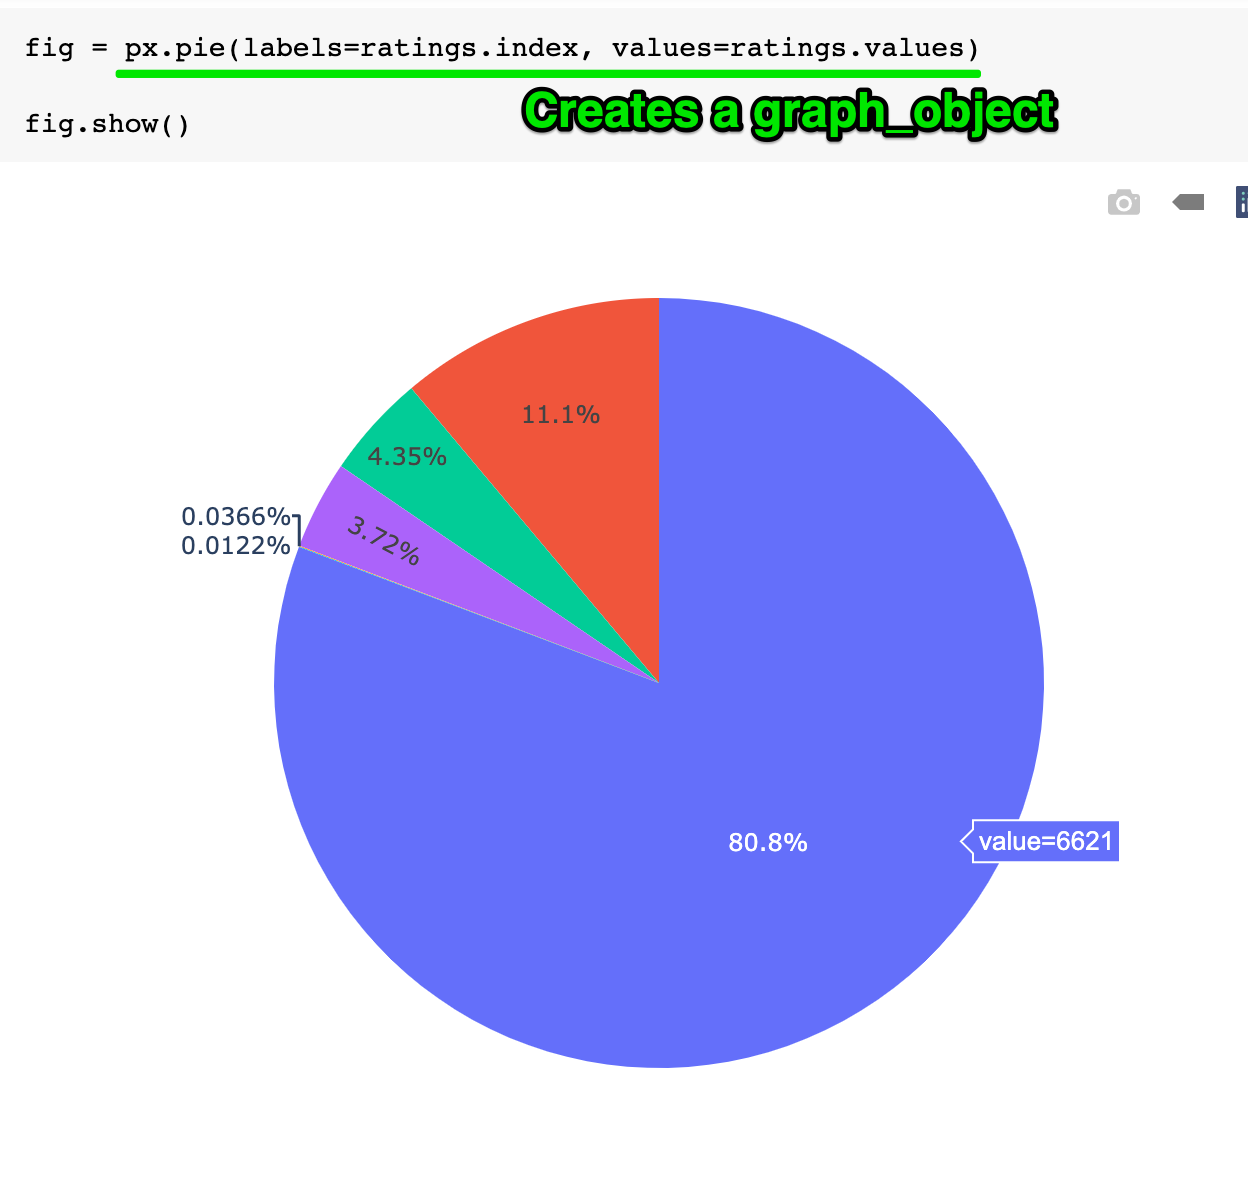

In [23]:
import plotly.io as pio

# Try setting the default renderer to 'iframe' or 'notebook'
pio.renderers.default = 'iframe'

In [24]:
fig = px.pie(names=ratings.index, values = ratings.values)
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [25]:
for value in df_apps_clean['Installs']:
    print(type(value))
    break

<class 'str'>


The Problem: Your data looks like "1,000,000". Python sees this as a word (String) because of the commas. If you ask Python to add 1 to it, it crashes.

- `.astype(str)`: This is a safety measure. It forces every single item in that column to be treated as text string first (just in case some were already numbers).

- `.str`: This tells pandas "I am about to use a String method." You need this accessor to perform text operations on a whole column.

- `.replace(',', "")`: This searches for every comma , and replaces it with nothing "" (effectively deleting it).

Result: "1,000,000+" becomes "1000000+".

In [26]:
# 1. Remove the comma
df_apps_clean['Installs'] = df_apps_clean['Installs'].astype(str).str.replace(',', "")

# 2. Remove the plus sign
df_apps_clean['Installs'] = df_apps_clean['Installs'].str.replace('+', "")

# 3. Convert to a number
df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])

In [27]:
# Filter for 1 billion or more
billion_apps = df_apps_clean[df_apps_clean['Installs'] >= 1000000000]

# Count the rows
billion_apps.count() 
# OR just check the number of rows
len(billion_apps)

20

In [28]:
single_download_apps = df_apps_clean[df_apps_clean['Installs'] ==1 ]
print(single_download_apps)
print(len(single_download_apps))

                    App Category  Rating  Reviews  Size_MBs  Installs  Type  \
21  KBA-EZ Health Guide  MEDICAL    5.00        4     25.00         1  Free   
28             Ra Ga Ba     GAME    5.00        2     20.00         1  Paid   
47              Mu.F.O.     GAME    5.00        2     16.00         1  Paid   

    Price Content_Rating   Genres  
21      0       Everyone  Medical  
28  $1.49       Everyone   Arcade  
47  $0.99       Everyone   Arcade  
3


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [29]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0,Teen,News & Magazines


In [30]:
df_apps_clean['Price'] = df_apps_clean['Price'].astype(str).str.replace("$","")
df_apps_clean['Price'] = df_apps_clean['Price'].str.replace(",","")

df_apps_clean['Price'] = pd.to_numeric(df_apps_clean['Price'])


### The most expensive apps sub $250

In [31]:
for value in df_apps_clean['Price']:
    print(type(value))
    break

<class 'float'>


In [32]:
df_apps_clean.sort_values(by='Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle


In [33]:
# 3. Filter the DataFrame to keep only apps with Price less than 250
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250].copy()

# Optional: Verify it worked by checking the max price left
print(df_apps_clean['Price'].max())

79.99


### Highest Grossing Paid Apps (ballpark estimate)

In [34]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean['Price'] * df_apps_clean['Installs']

In [36]:
df_apps_clean.sort_values(by='Revenue_Estimate',ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
...,...,...,...,...,...,...,...,...,...,...,...
10807,Google+,SOCIAL,4.20,4831125,5.30,1000000000,Free,0.00,Teen,Social,0.00
10813,Google Photos,PHOTOGRAPHY,4.50,10858556,6.90,1000000000,Free,0.00,Everyone,Photography,0.00
10817,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.30,9235155,12.00,1000000000,Free,0.00,Everyone,Travel & Local,0.00
10818,Google Street View,TRAVEL_AND_LOCAL,4.20,2129689,12.00,1000000000,Free,0.00,Everyone,Travel & Local,0.00


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [37]:
df_apps_clean.Category.nunique()

33

In [38]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               718
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             291
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

In [39]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [40]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines,0.00


In [42]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [44]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h')
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [45]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [46]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,718,7999724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [47]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [50]:
df_apps_clean['Genres'].nunique()

114

In [54]:
df_apps_clean.Genres.value_counts().sort_values(ascending=True).head(60)

Genres
Adventure;Education                       1
Lifestyle;Pretend Play                    1
Strategy;Education                        1
Communication;Creativity                  1
Music & Audio;Music & Video               1
Puzzle;Education                          1
Health & Fitness;Education                1
Entertainment;Education                   1
Parenting;Brain Games                     1
Travel & Local;Action & Adventure         1
Adventure;Brain Games                     1
Arcade;Pretend Play                       1
Health & Fitness;Action & Adventure       1
Casual;Music & Video                      1
Tools;Education                           1
Role Playing;Brain Games                  1
Board;Pretend Play                        1
Racing;Pretend Play                       1
Strategy;Creativity                       1
Comics;Creativity                         1
Card;Brain Games                          1
Lifestyle;Education                       1
Art & Design;Pretend Play

In [55]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8562,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [56]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [57]:
df_apps_clean.Type.value_counts()


Type
Free    7593
Paid     589
Name: count, dtype: int64

In [58]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [60]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [61]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

In [62]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [63]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()
